In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [ ]:
#CDF PDF

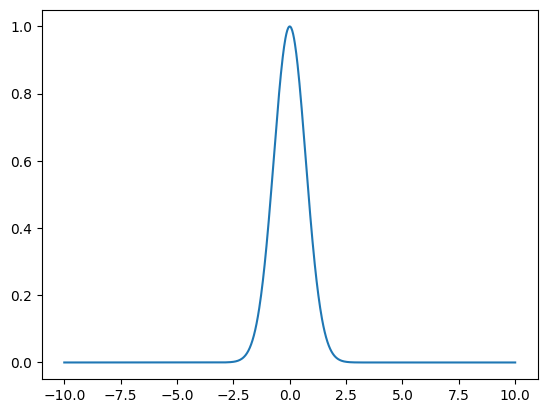

In [ ]:
x = np.linspace(-10,10,1000) #create our range
y = 2.71**(-x**2) #e^(x^(-2)) is the formula for a normal curve function
plt.plot(x,y) #plot it

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [ ]:
def normal_pdf(x,mu,sigma): #probability density function of a normal curve, mu is the mean of the function and sigma is the standard deviation

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [ ]:
x = np.linspace(-6,6,1000)

In [ ]:
x

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189,
       -5.87987988, -5.86786787, -5.85585586, -5.84384384, -5.83183183,
       -5.81981982, -5.80780781, -5.7957958 , -5.78378378, -5.77177177,
       -5.75975976, -5.74774775, -5.73573574, -5.72372372, -5.71171171,
       -5.6996997 , -5.68768769, -5.67567568, -5.66366366, -5.65165165,
       -5.63963964, -5.62762763, -5.61561562, -5.6036036 , -5.59159159,
       -5.57957958, -5.56756757, -5.55555556, -5.54354354, -5.53153153,
       -5.51951952, -5.50750751, -5.4954955 , -5.48348348, -5.47147147,
       -5.45945946, -5.44744745, -5.43543544, -5.42342342, -5.41141141,
       -5.3993994 , -5.38738739, -5.37537538, -5.36336336, -5.35135135,
       -5.33933934, -5.32732733, -5.31531532, -5.3033033 , -5.29129129,
       -5.27927928, -5.26726727, -5.25525526, -5.24324324, -5.23123123,
       -5.21921922, -5.20720721, -5.1951952 , -5.18318318, -5.17

In [ ]:
mu = 0

In [ ]:
sigma = 1

In [ ]:
pdf = normal_pdf(x,mu,sigma) #test PDF

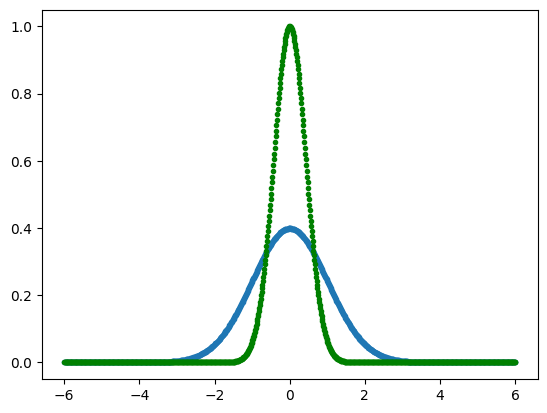

In [ ]:
plt.plot(x,pdf,'.')
plt.plot(x, y,'g.')

In [ ]:
n=5 #our count of numbers
x[0:n] #show the first n indeces of x
np.sum(x[0:n]) #sum the indeces from 0 to our n

-29.879879879879876

In [ ]:
# def cumulative_sum(x): #make a generalized function to do that for us

#   y = np.zeros(x.shape) #make an array y with the same dimensions as our input array x

#   for n in range(x.shape[0]): #for loop with the same count as the size of the first dimension of our array

#       y[n] = np.sum(x[0:n]) #replaces each index of y with the total sum of our input array x up to that index

# #   y = y / np.max(y)

#   return y #return our cumulative sum array

def cumulative_sum(x): #indexing errors in the original, write a new function for efficiency and so our sum isn't off by 1
    y = np.zeros_like(x)  # Create an array y with the same shape as x

    for n in range(1, x.shape[0] + 1):
        y[n - 1] = np.sum(x[:n])  # Compute the cumulative sum up to the current index

    return y

In [ ]:
z = np.array([1,2,3,4,5]) #make a test array

In [ ]:
z

array([1, 2, 3, 4, 5])

In [ ]:
np.sum(z[1:1])

0

In [ ]:
cumulative_sum(z) #test our function

array([ 1,  3,  6, 10, 15])

In [ ]:
cdf = cumulative_sum(pdf)

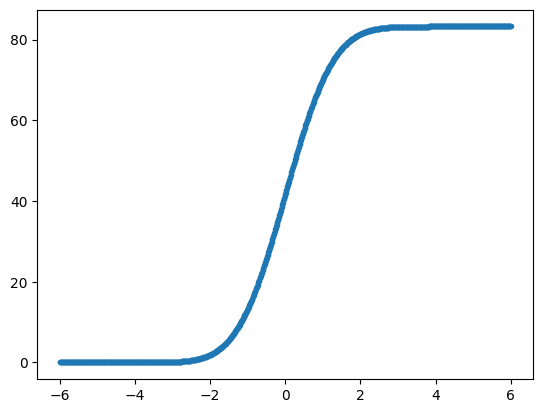

In [ ]:
plt.plot(x,cdf,'.');

In [ ]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

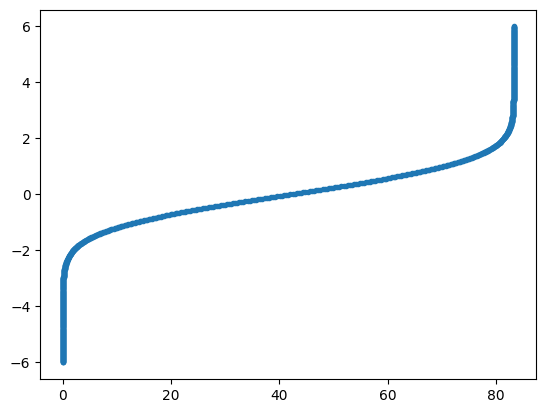

In [ ]:
plt.plot(cdf,x,'.');

In [ ]:
def find_nearest(array, value): #this function will intake an array and a value and return the number in the array closest to that value

  idx = np.argmin(np.abs(array - value)) #index of the number in the array which has the absolute minimum distance to the given value

  return idx #returns the index, which we can use to check the array for the value if necessary

In [ ]:
z = np.array([11.2,32,63,4.3,5.67]) #make a test array

In [ ]:
find_nearest(z, 22.1) #run the function through it, it returns the index which contains the value closest to 22.1

1

In [ ]:
z[1] #running the index returned by the find_nearest function returns the value

32.0

In [ ]:
find_nearest(cdf, 0.1) #find the nearest value to 0.1 in our cumulative distribution array

246

In [ ]:
cdf[246] #show me the value of cdf at the 246th index

0.09878424758063288

In [ ]:
xr = np.random.random((1000000,)) #make a random vector matrix of size 10,000

In [ ]:
r = np.random.random() #make a random number and save it as r

In [ ]:
r

0.9548195477139807

In [ ]:
xr[find_nearest(xr, r)] #find the closest number in our matrix to our random variable

0.9548195905161884

In [ ]:
w = np.zeros(xr.shape[0]) #make a matrix of the same shape as xr and call it w

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])] #for each value of x (x is our evenly spaced array between -6 and 6) find the index of x which contains the closest value in our cumulative distribution to our individual random xr value and save it in array w

In [ ]:
w.shape

(1000000,)

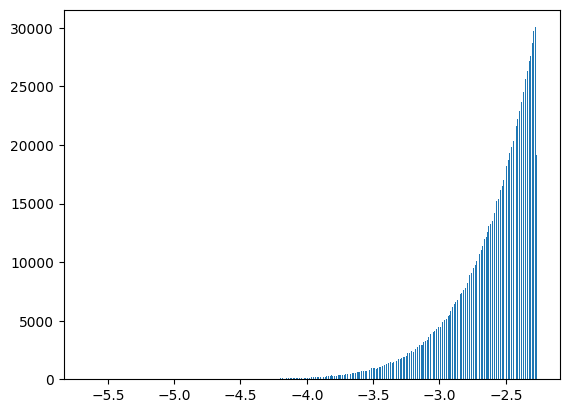

In [ ]:
plt.hist(w,500); #histogram with the values of w shows the distribution of the values populated by our code

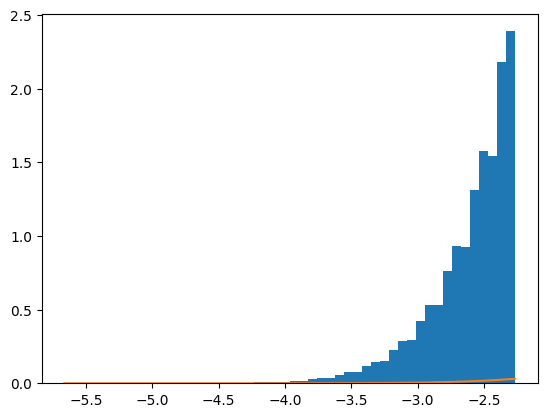

In [ ]:
num_bins = 50 #we plot w by the function of the graph to see if the line corresponds
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

# Homework

# Birthday Paradox

In [ ]:
import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 6

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.039

In [ ]:
import random

def check_birthdays(num_people=10, total_sims=1000):
  success_sims = 0

  for i in range(total_sims):
    bdays = [random.randint(1, 365) for _ in range(num_people)]
    if len(bdays) != len(set(bdays)): #we use this code because a set cannot contain duplicate entries, thus we are converting bdays array to a set and seeing if the length matches.  if so then no duplicate birthdays exist, if not then there is a duplicate birthday and we add to the tally of successful simulations
      success_sims += 1 #increment the number of successful simulations for each run which contains a duplicate
  p = success_sims / total_sims #probability is successes/attempts
  return p #return the probability

print(check_birthdays())
print(check_birthdays(30, 1000))

0.107
0.721


# Monty Hall

In [ ]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.3318, 0.6682)

In [ ]:
#i will do my own take on the monty hall game

def montyhallsim(num_sims=10000):
  stay = 0
  switch = 0
  doorset = [1,2,3]; #define the set of doors
  for i in range(num_sims): #for loop containing the simulations
    choice = random.randint(1,3) #player selection
    car = random.randint(1,3) #the random door behind which the car lies
    for j in doorset:
      if j != car and j != choice: #we open a door that's not the car or the player choice, note if the player choice is the car choice this will open the first door which isn't the player choice in the list, which is unimportant for a simulation
        opened = j #save which door we opened, which we don't even need to do, because as we can see from the game logic the chance is not dependent on this door whatsoever
    if choice == car:
      stay += 1
    else:
      switch += 1
  staychance=stay/num_sims
  switchchance=switch/num_sims
  return staychance, switchchance

montyhallsim(1000000)

(0.333441, 0.666559)

# Simple Craps

In [ ]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4953

# Collector's Card Paradox


In [ ]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.1973

In [ ]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.667